# Week 14

HW : Define a Bayesian model on Iris dataset and solve that model.

### [Bayesian Model1]
* Suppose all attributes follow gaussian distribution
* Suppose all atributes are independent with each other

# Model Schematic

In [1]:
#from networkx.drawing.nx_pydot import to_pydot
# from pgmpy.factors.discrete import TabularCPD
# from pgmpy.models import BayesianModel
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
from networkx import draw_networkx_nodes
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import norm

In [16]:
data = pd.read_csv('Iris.csv')

In [4]:
data = data.drop(['Id'],axis=1)

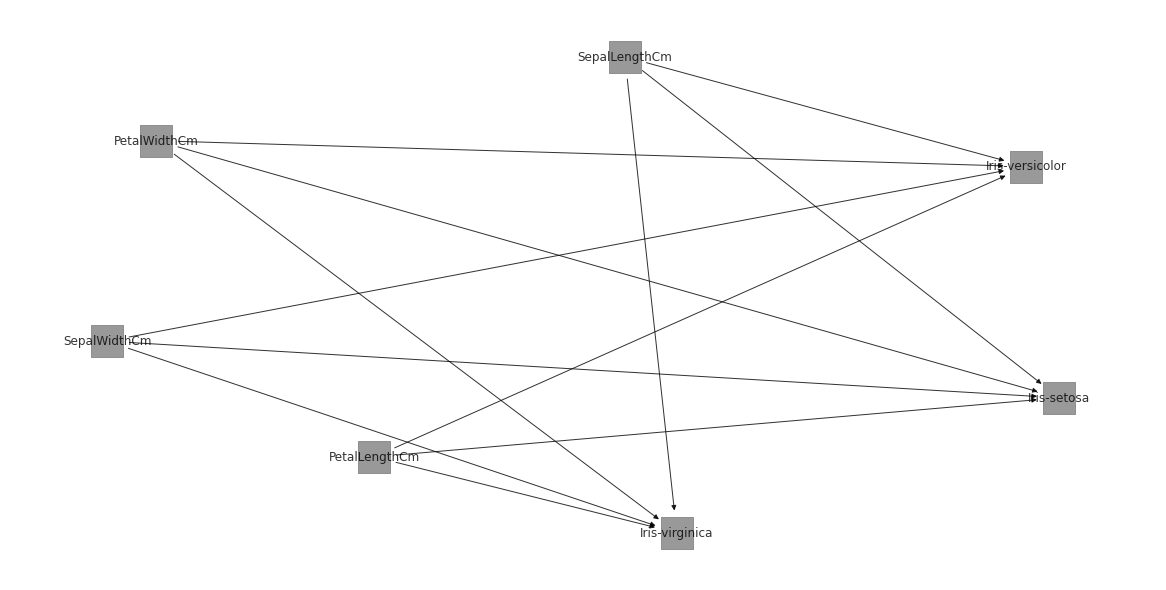

In [7]:
g4 = nx.DiGraph()
plt.figure(figsize=(16, 8))
# g4.add_node("SepalLentgth")
# g4.add_node("SepalWidth")
# g4.add_node("PetalLength")
# g4.add_node("PetalWidth")
g4.add_node("Iris-setosa")
g4.add_node("Iris-virginica")
g4.add_node("Iris-versicolor")
for j in data.columns[:4]:
    g4.add_node(j)
pos = nx.spring_layout(g4)
for i in set(data['Species']):
    for j in data.columns[:4]:
        g4.add_edge(j,i)
        

nx.draw(g4,with_labels =True,node_size = 1000,node_color ="grey",alpha=0.8,node_shape='s',pos=pos)

# Train

In [8]:
train,test = train_test_split(data,test_size=0.33)

In [9]:
Condition = train.groupby(['Species'], as_index='Species').agg({'SepalLengthCm':['mean','std'],'SepalWidthCm':['mean','std'],'PetalLengthCm':['mean','std'],'PetalWidthCm':['mean','std']})

In [10]:
Condition

SepalLengthCm           SepalWidthCm           PetalLengthCm  \
                         mean       std         mean       std          mean   
Species                                                                        
Iris-setosa          4.978125  0.348021     3.440625  0.374044      1.456250   
Iris-versicolor      5.974286  0.540339     2.822857  0.324568      4.277143   
Iris-virginica       6.524242  0.636902     3.012121  0.361211      5.521212   

                          PetalWidthCm            
                      std         mean       std  
Species                                           
Iris-setosa      0.196645     0.237500  0.112880  
Iris-versicolor  0.498283     1.360000  0.197335  
Iris-virginica   0.543575     2.033333  0.268871

In [11]:
prior = train.describe()

In [12]:
prior

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.00000,100.000000
mean,5.837000,3.083000,3.78500,1.223000
std,0.819664,0.434859,1.74248,0.761691
min,4.300000,2.000000,1.00000,0.100000
25%,5.100000,2.800000,1.60000,0.300000
50%,5.800000,3.000000,4.40000,1.400000
75%,6.400000,3.300000,5.10000,1.800000
max,7.900000,4.400000,6.70000,2.500000


In [13]:
test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
139,6.9,3.1,5.4,2.1,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor
23,5.1,3.3,1.7,0.5,Iris-setosa


In [19]:

IS_PD = []
IVS_PD = []
IVG_PD = []

for attribute in test.columns[:4]:
    IS_PD.append(norm(Condition.loc['Iris-setosa'][attribute]['mean'], Condition.loc['Iris-setosa'][attribute]['std']))

for attribute in test.columns[:4]:
    IVS_PD.append(norm(Condition.loc['Iris-versicolor'][attribute]['mean'], Condition.loc['Iris-versicolor'][attribute]['std']))

for attribute in test.columns[:4]:
    IVG_PD.append(norm(Condition.loc['Iris-virginica'][attribute]['mean'], Condition.loc['Iris-virginica'][attribute]['std']))



In [20]:
result = []

for x in test.index:
    measure = test.loc[x]
    IS = IS_PD[0].pdf(measure[0])*IS_PD[1].pdf(measure[1])*IS_PD[2].pdf(measure[2])*IS_PD[3].pdf(measure[3])
    IVS = IVS_PD[0].pdf(measure[0])*IVS_PD[1].pdf(measure[1])*IVS_PD[2].pdf(measure[2])*IVS_PD[3].pdf(measure[3])
    IVG = IVG_PD[0].pdf(measure[0])*IVG_PD[1].pdf(measure[1])*IVG_PD[2].pdf(measure[2])*IVG_PD[3].pdf(measure[3])
    
    result.append([IS,IVS,IVG])
    

In [21]:
result

[[4.844198625889323e-153, 1.6407982070464014e-05, 0.5813257783902798],
 [4.7558723489267374e-98, 0.2658450529815784, 0.01886171446624104],
 [0.32945432150014187, 2.224019475913431e-19, 2.448840649671052e-26],
 [1.0854883162668999e-79, 0.5653193207374148, 0.004111306845541495],
 [0.23853521744836603, 1.571343968858974e-11, 7.245558466568595e-20],
 [3.9771546747618896, 3.7188297497725004e-16, 1.3734138415684654e-24],
 [0.5117858873004333, 4.357127993102199e-16, 6.023800280388411e-24],
 [7.674891059334999e-63, 1.0148563087795448, 0.00022875223461938602],
 [2.9626483026568766, 2.266048839104104e-16, 7.987238754900247e-25],
 [1.834664698854324, 8.37390954834143e-15, 1.327622048493477e-22],
 [7.395630355287473, 8.130186820555604e-17, 6.560737758295004e-25],
 [5.538090745642168, 4.820650445453584e-16, 4.356843791896732e-24],
 [2.88689536469495e-166, 1.2046707543048064e-05, 0.174500709086144],
 [5.286787284189414e-51, 0.23075529297293418, 5.524803914644828e-06],
 [0.7050654228667754, 3.7001305

In [22]:
predict_index = []
label = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in result:
    predict_index.append(label[np.argmax(i)])

In [23]:
predict_index == test['Species']

139     True
72      True
33      True
58      True
23      True
6       True
16      True
94      True
3       True
20      True
0       True
11      True
125     True
67      True
8       True
73      True
66      True
49      True
75      True
103     True
134    False
69      True
57      True
122     True
102     True
17      True
133    False
53      True
143     True
27      True
127     True
18      True
39      True
111     True
118     True
90      True
140     True
62      True
41      True
135     True
71      True
31      True
28      True
145     True
142     True
37      True
113     True
80      True
141     True
78      True
Name: Species, dtype: bool

그동안 감사했습니다 :)